# Homework #4
# CP 7.1, 7.2, 7.3, 7.4, 7.5, 7.9 
Newton Kwan
<br>
Professor Walter
<br>
PHY 566
<br>
6 March 2018 

In [16]:
from numpy.fft import rfft, irfft, rfft2, irfft2
from numpy import sin, linspace, loadtxt, array, zeros
from math import pi, floor, exp
from pylab import legend, xlabel, ylabel, title, imshow, plot, xlim, ylim, jet, gray
from scipy import signal
%matplotlib inline

(1) 7.1 FTs of simple functions. As mentioned above, you can either write your own
function as in dft.py as they mention, or use rfft from numpy.

We write Python programs to calculate the coefficients in the discrete Fourier transforms of the following periodic functions sampled at N = 1000 evenly spaced points, and make plots of their amplitudes similar to the plot shown in Fig. 7.4 

a) A single cycle of a square-wave with amplitude 1 

b) The sawtooth wave y_n = n 

c) The modulated sine wave y_n = sin(pi*n/N)sin(20*pi*n/N) 

In [166]:
# Define constants 
N = 1000 

Text(0,0.5,'c_n')

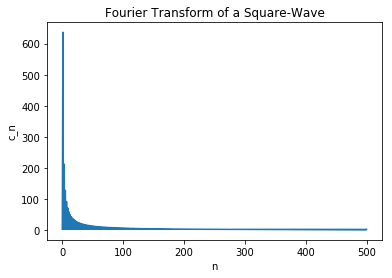

In [187]:
#a) A single cycle of a square-wave with amplitude 1 

results = []

xrange = linspace(0, 1, N)

# Define Square Wave 
def f(n): 
    return signal.square(2*pi*n)

for i in xrange:
    results.append(f(i))
    
c = rfft(results)

#plot(results)
plot(abs(c))
title("Fourier Transform of a Square-Wave")
xlabel("n")
ylabel("c_n")

Text(0,0.5,'c_n')

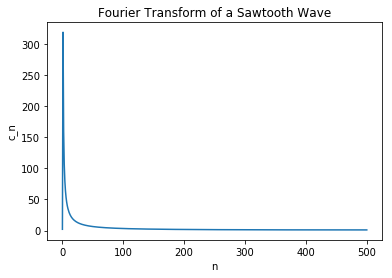

In [190]:
#b) The sawtooth wave y_n = n 

# Define sawtooth 
def f(n):
    return signal.sawtooth(2*pi*n)

results = []
xrange = linspace(0, 1, N)

for i in xrange: 
    results.append(f(i))
    
c = rfft(results)

#plot(results)
plot(abs(c))
title("Fourier Transform of a Sawtooth Wave")
xlabel("n")
ylabel("c_n")

Text(0,0.5,'c_n')

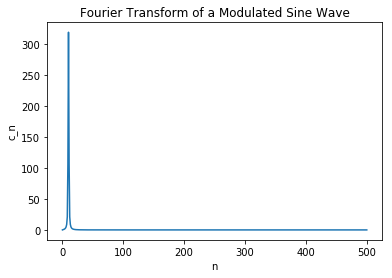

In [198]:
#c) The modulated sine wave y_n = sin(pi*n/N)sin(20*pi*n/N)

def f(n): 
    return sin(pi*n/N)*sin(20*pi*n/N)

results = []
xrange = linspace(0, 1, N)

for i in range(0, N, 1): 
    results.append(f(i))
    
c = rfft(results)

#plot(results)
plot(abs(c))
title("Fourier Transform of a Modulated Sine Wave")
xlabel("n")
ylabel("c_n")

(2) 7.2 Sunspots!

Make a graph of th sunspots as function of time 

Calculate the fourier transform of the sunspot data and then make a graph of the magnitude squared abs(c_k)^2 of the Fourier coefficients as a function of k 

Looks like a cycle is about 100 months


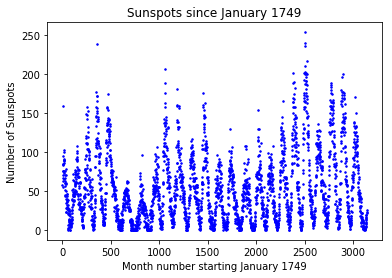

In [199]:
# From assignment 2 
data = loadtxt("sunspots.txt",float)
time = data[:,0] #number of months since Jan 1749 
sunspots = data[:,1] #number of sunspots per month since Jan 1749 
plot(time, sunspots, "b.", markersize = 3)
ylabel("Number of Sunspots")
xlabel("Month number starting January 1749")
title("Sunspots since January 1749")

print("Looks like a cycle is about 100 months")

Text(0.5,1,'Fourier transform of Sunspot data')

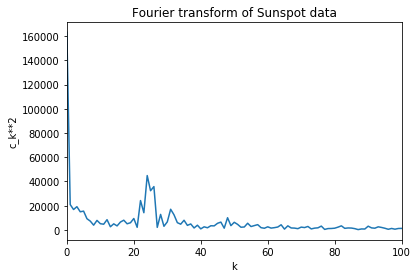

In [200]:
a = rfft(sunspots)
plot(abs(a))
xlim(0, 100)
xlabel("k")
ylabel("c_k**2")
title("Fourier transform of Sunspot data")

We estimate the peak at around k = 22

$$ sin(\frac{2\pi kx}{L})$$

a = 60000 / (2*pi) and then sqrt(a) roughly equals 100. This is fairly close to our guess of 100. 

(3) 7.3 Musical instruments

Write a program that loads a waveform from one of these files, plots it, then calculates its discrete Fourier transform and plots the magnitudes of the first 10000 coefficients in a manner similar to Fig. 7.4. 

In [201]:
pianodata = loadtxt("piano.txt", float)
trumpetdata = loadtxt("trumpet.txt", float)

Text(0.5,1,'Fourier Transform of Piano')

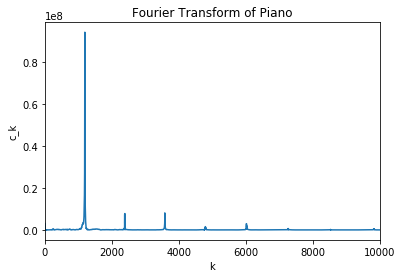

In [202]:
c = rfft(pianodata)

#plot(pianodata)
plot(abs(c))
xlim(0, 10000)
xlabel("k")
ylabel("c_k")
title("Fourier Transform of Piano")

Text(0.5,1,'Fourier Transform of Trumpet')

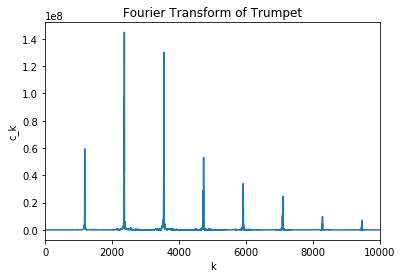

In [203]:
trumpetft = rfft(trumpetdata)

#plot(trumpetdata)
plot(abs(trumpetft))
xlim(0, 10000)
xlabel("k")
ylabel("c_k")
title("Fourier Transform of Trumpet")

From these we can conclude that the sound or more correctly the timbre of the piano and trumpet will be different. The timbre will be different because each instrument has a different set of overtones or harmonics associated with it.

(4) 7.4 Smoothing

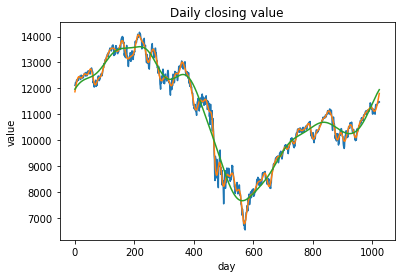

In [38]:
data = loadtxt("dow.txt")

plot(data)
xlabel("day")
ylabel("value")
title("Daily closing value")

# Calculate the coefficients of teh discrete Fourier transform     
    
c = rfft(data)

# Set all but first 10% of elements to 0 
tenpercent = int(len(c) / 10)

for i in range(tenpercent, len(c), 1):
    c[i] = 0
    
# Calculate the inverse Fourier transform of the resulting array 

d = irfft(c)
plot(d)

twopercent = int(len(c) / 50)

for i in range(twopercent, len(c), 1):
    c[i] = 0
    
e = irfft(c)
plot(e)

The inverse fourier transform matches up with the original plot, which makes sense because we are taking the fourier transform of the data. Taking the inverse of the fourier transform should hopefully give us the same graph back. When we set some values to 0, this smooths the function, approaching a purer sine way as we use less and less values. Of course, this is at the cost of accuracy. 

(5) 7.5 Artifacts

The function f(t) represents a square-wave with amplitude 1 and frequency 1 Hz :

$$f(t) 
= 
\begin{cases}
1, & \text{if 2t (rounded down) is even,} \\
-1, & \text{if 2t (rounded down) is odd}
\end{cases}$$ 

We will attempt to smooth the function using a Fourier transform, as we did in the previous exercise. 

We write a python program that creates an array of N = 1000 elements containing a thousand equally spaced samples from a single cycle of this square-wave. 

Calculate the discrete Fourier transform of the array. 

Now, we set all but the first ten Fourier coefficients to zero.

Then we invert the Fourier transform again to recover the smoothed signal.

Make a plot of the result and on the same axes show the original square-wave as well.                                                               

Text(0.5,1,'Square function and its Fourier Transform')

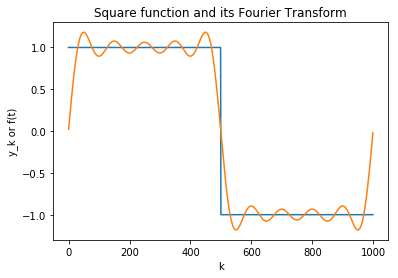

In [114]:
# create an array of values of f(t) evaluated at 
# 1000 equally spaced intervals between 0 and 1 

N = 1000
samples = linspace(0, 1, N)

# stores array of vales of f(t)
values = zeros(N)

for i in range(0, N, 1): 
    if i == (N-1):
        values[i] = -1
    elif floor(2*samples[i]) % 2 == 0: 
        values[i] = 1 
    else:
        values[i] = -1
        
#print(values)

# Calculate the discrete Fourier transform 

c = rfft(values)

# Set all but first 10 to 0 

for i in range(10, len(c), 1): 
    c[i] = 0

# invert the Fourier transform again

d = irfft(c)

plot(values)
plot(d)
xlabel("k")
ylabel("y_k or f(t)")
title("Square function and its Fourier Transform")

We find the signal is not simply smoothed -- there are artifacts, wiggles, in the results. These artifacts come from the reducing the number of coefficients in the array of fourier transformed values. It may be faster to process the fourier transform, but our inverse Fourier transform does not match the square wave as well. Artifacts similar to these arise when Fourier coefficients are discarded in audio and visual compression schemes like those described in Section 7.3.1 and are the primary source of imperfections in digitally compressed sound and images.       

7.9 Blurred image

In the file blur.txt, there is a grid of values representing brightness on a black-and-white photo -- a badly out-of-focus one tha thas been deliberately blurred using a Gaussian point spread function of width $\sigma = 25$. 

We write a program that reads the grid of values into a two-dimensional array of real numbers and then draws the values on the screen of the computer as a density plot. 

We write another program that creates an array of the same size as the photo, containing a grid of samples drawn from the Gaussian f(x,y) with $\sigma = 25$. 

$$ f(x, y) = exp\bigg(-\frac{x^2 + y^2}{2 \sigma^2}\bigg) $$

We make a density plot of these values on the screen in order to get a visualization of our point spread function. We note that the point spread function is periodic (along both axes), which means that the values for negative x and y are represented at the end of the interval. And since the Gaussian is centered on the origin, this means there should be bright patches in each of the four corners of the picture, which is what we observe. 

We now combine these two programs and add Fourier transforms using the functions rfft2 and irff2 from numpy.fft to make a program that does the following: 

1) Reads in the blurred photo 
2) Calculates the point spread function
3) Fourier transforms both 
4) Divides one by the other 
5) Performs an inverse transform to get the unblurred picture
6) Displays the unblurred photo on the screen 

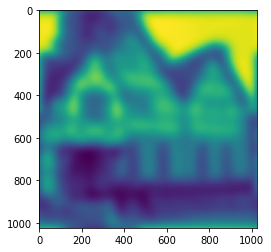

In [6]:
# Load data from blur.txt and plot

data = loadtxt("blur.txt")
imshow(data)

1024


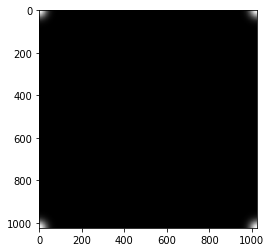

In [23]:
# Gaussian 
sig = 25 
size = len(data)
def f(x, y): 
    topleft = exp(-(x**2 + y**2) / (2*sig**2))
    topright = exp(-((x-1024)**2 + y**2) / (2*sig**2))
    botleft = exp(-(x**2 + (y-1024)**2) / (2*sig**2))
    botright = exp(-((x-1024)**2 + (y-1024)**2) / (2*sig**2))
    return topleft + topright + botleft + botright

gaussian = zeros([size, size])

for i in range(0, size, 1):
    for j in range(0, size, 1):
        gaussian[i][j] = f(i, j)

print(size)
imshow(gaussian)
#print(gaussian)

We now combine these two programs and add Fourier transforms using the functions rfft2 and irff2 from numpy.fft to make a program that does the following: 

1) Reads in the blurred photo 
2) Calculates the point spread function
3) Fourier transforms both 
4) Divides one by the other 
5) Performs an inverse transform to get the unblurred picture
6) Displays the unblurred photo on the screen 

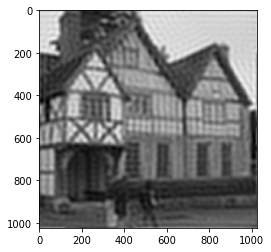

In [26]:
# Load data from blur.txt and plot

data = loadtxt("blur.txt")
imshow(data)

# Calculate the point spread function 

sig = 25 
size = len(data)
gaussian = zeros((size, size))

# Define PSF 

def f(x, y): 
    topleft = exp(-(x**2 + y**2) / (2*sig**2))
    topright = exp(-((x-1024)**2 + y**2) / (2*sig**2))
    botleft = exp(-(x**2 + (y-1024)**2) / (2*sig**2))
    botright = exp(-((x-1024)**2 + (y-1024)**2) / (2*sig**2))
    return topleft + topright + botleft + botright

for i in range(0, size, 1):
    for j in range(0, size, 1):
        gaussian[i][j] = f(i, j)

#imshow(gaussian)
#print(gaussian)

# Fourier transform data and gaussian 

c = rfft2(data)
d = rfft2(gaussian)


# Divide blurred image by psf 


epsilon = 1e-3 
for i in range(0, size, 1): 
    for j in range(0, (int(size/2)) + 1, 1): 
        if d[i][j] < epsilon:
            e[i][j] = c[i][j] 
        else: 
            e[i][j] = c[i][j] / d[i][j] 

# Perform inverse 

f = irfft2(e)

imshow(f)